In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

The data we read below is 5000 scenarios and problem formulation 0 (most aggregated kpis)

In [3]:
experiments = pd.read_csv("data/scenarios_aggregated.csv").drop(columns = 'Unnamed: 0')
outcomes = pd.read_csv("data/outcomes_aggregated.csv").drop(columns = 'Unnamed: 0')

In [5]:
experiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   A.0_ID flood wave shape  5000 non-null   float64
 1   A.1_Bmax                 5000 non-null   float64
 2   A.1_Brate                5000 non-null   float64
 3   A.1_pfail                5000 non-null   float64
 4   A.2_Bmax                 5000 non-null   float64
 5   A.2_Brate                5000 non-null   float64
 6   A.2_pfail                5000 non-null   float64
 7   A.3_Bmax                 5000 non-null   float64
 8   A.3_Brate                5000 non-null   float64
 9   A.3_pfail                5000 non-null   float64
 10  A.4_Bmax                 5000 non-null   float64
 11  A.4_Brate                5000 non-null   float64
 12  A.4_pfail                5000 non-null   float64
 13  A.5_Bmax                 5000 non-null   float64
 14  A.5_Brate               

In [6]:
experiments.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,0.0,199.530956,1.5,0.895959,314.268740,1.0,0.045488,80.791799,10.0,0.190662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Policy 0,dikesnet
1,105.0,36.782383,1.5,0.028990,326.381980,1.0,0.764865,346.043708,10.0,0.070769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Policy 0,dikesnet
2,130.0,179.815934,10.0,0.019728,183.547219,1.0,0.305984,126.681992,10.0,0.057468,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Policy 0,dikesnet
3,97.0,259.187505,1.0,0.458828,205.460123,10.0,0.867546,92.509064,1.5,0.234629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Policy 0,dikesnet
4,68.0,32.833171,1.5,0.078946,302.432829,1.0,0.833673,325.647406,10.0,0.348743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,Policy 0,dikesnet


In [5]:
experiments.scenario

0          0
1          1
2          2
3          3
4          4
        ... 
4995    4995
4996    4996
4997    4997
4998    4998
4999    4999
Name: scenario, Length: 5000, dtype: int64

In [7]:
outcomes

,All Costs,Expected Number of Deaths
0,3.676729e+08,0.840975
1,1.598755e+09,4.293203
2,1.250359e+09,3.231810
3,4.957370e+08,2.120857
4,1.050472e+09,2.046002
...,...,...
4995,7.921617e+08,2.441896
4996,1.551536e+09,4.223332
4997,4.431177e+07,0.049184
4998,7.248042e+08,2.982597


In [8]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   All Costs                  5000 non-null   float64
 1   Expected Number of Deaths  5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [8]:
outcomes.columns

Index(['All Costs', 'Expected Number of Deaths'], dtype='object')

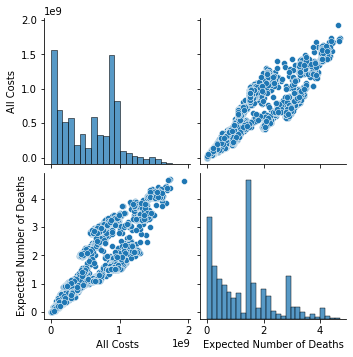

In [9]:
sns.pairplot(outcomes)
plt.show()

- High correlation between the two KPIs 
- Some spikes in the histograms

In [10]:
outcomes.corr()

,All Costs,Expected Number of Deaths
All Costs,1.000000,0.830895
Expected Number of Deaths,0.830895,1.000000


Deaths and costs super correlated in a diamond manner :) Note that costs here are only the damage because there is no investment (RfR, dike heightening...) in this scenario discovery runs

In [11]:
outcomes_classified = outcomes['All Costs'] > np.quantile(outcomes['All Costs'], 0.90)

Worst ten percent (in terms of damage (costs)) classified for prim

In [12]:
outcomes_classified

0       False
1        True
2        True
3       False
4        True
        ...  
4995    False
4996     True
4997    False
4998    False
4999    False
Name: All Costs, Length: 5000, dtype: bool

In [13]:
from ema_workbench.analysis import prim
from ema_workbench import MultiprocessingEvaluator, ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(experiments, outcomes_classified, threshold=0.80)
box1 = prim_alg.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 500 cases of interest
[MainProcess/INFO] mean: 0.8320610687022901, mass: 0.0524, coverage: 0.436, density: 0.8320610687022901 restricted_dimensions: 3


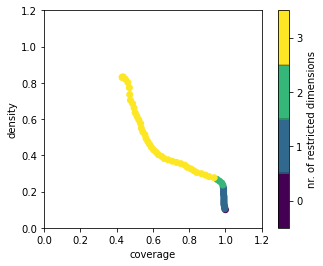

In [14]:
box1.show_tradeoff()
plt.show()

In [15]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

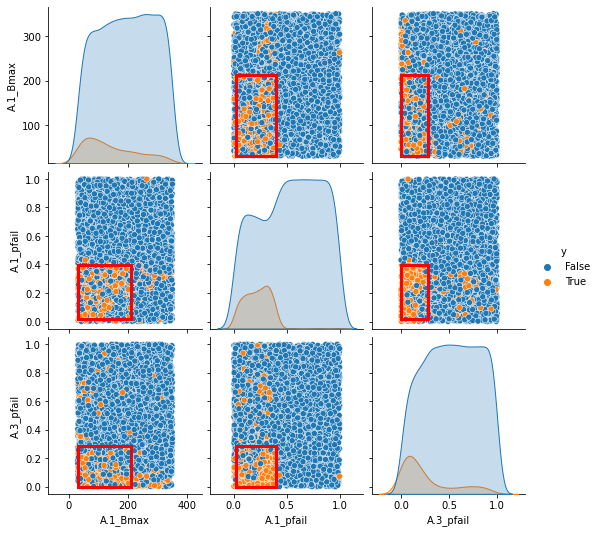

In [19]:
box1.select(54)
fig = box1.show_pairs_scatter()
plt.show()

The box shows that by restricting the variables A.1_pfail, A.3_pfail and A.1_Bmax it is possible to differentiate highly problematic scenarios. This analysis suggests that the uncertainty of these three variables may have significant impact on how the KPIs turn out to be. This insight will be investigated in global sensitivity analysis methods (Sobol and Extra trees)

An illustration of the impact of A.1_pfail and A.3_pfail on total costs (flood caused damage) KPI:

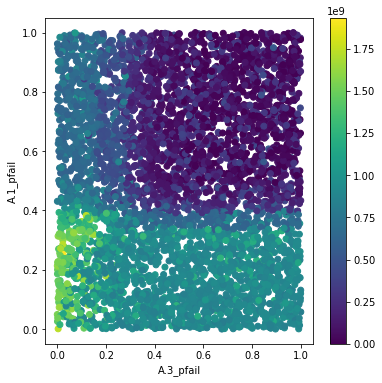

In [25]:
fig, ax = plt.subplots(figsize=(6,6))

m = ax.scatter(experiments["A.3_pfail"], experiments["A.1_pfail"], c=outcomes['All Costs'])
ax.set_xlabel("A.3_pfail")
ax.set_ylabel("A.1_pfail")
fig.colorbar(m)

plt.show()


Although not intuitive semantically, it was identified (by referring to the course guide) that the pfail variables represent the strgenth of dikes. With this in mind, it makes sense to get a region of high damage when both of the parameters get their lowest possible value.;

In [16]:
# import statsmodels.api as sm

# X = experiments.drop(['model','policy'], inplace=False, axis=1)
# X_0 = sm.add_constant(X)

# est = sm.OLS(outcomes['All Costs'], X_0.astype(float)).fit()
# print(est.summary())
# print(est.params)

regression also kind of confirms that (with low p-values) pfail variables matter a lot in explaining the difference in damage

Let's see the worst damage scenario as a baseline for optimization:

In [17]:
experiments["All Costs"] = outcomes["All Costs"]

In [18]:
experiments.sort_values(by = "All Costs", ascending = False).head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,policy,model,All Costs
1969,62.0,108.956062,10.0,0.252031,72.829467,10.0,0.025200,271.714467,10.0,0.023833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Policy 0,dikesnet,1.933350e+09
4072,126.0,116.696870,1.0,0.383070,56.912299,1.0,0.069485,62.654535,10.0,0.118755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Policy 0,dikesnet,1.735929e+09
3235,12.0,63.765979,1.0,0.001037,106.370314,1.0,0.043443,238.970203,10.0,0.003781,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Policy 0,dikesnet,1.735732e+09
3434,29.0,56.396976,1.0,0.285644,130.397615,1.0,0.010325,88.773707,1.0,0.022961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Policy 0,dikesnet,1.724556e+09
4403,128.0,40.873534,10.0,0.179006,149.277961,1.5,0.117941,171.614324,10.0,0.083705,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Policy 0,dikesnet,1.701424e+09


Scenario with the index 1969 is the worst case scenario wrt All Costs KPI.

In [34]:
outcomes.sort_values(by = "Expected Number of Deaths", ascending = False).head()

,All Costs,Expected Number of Deaths
3235,1.735732e+09,4.689316
3434,1.724556e+09,4.678378
4403,1.701424e+09,4.663196
1969,1.933350e+09,4.639471
1104,1.680908e+09,4.436747


Scenario with the index 3235 is the worst case scenario wrt Expected Number of Deaths KPI.

In [43]:
outcomes.sort_values(by = "All Costs", ascending = False).iloc[2500,:]

All Costs                    6.105743e+08
Expected Number of Deaths    1.090815e+00
Name: 432, dtype: float64

Scenario with the index 432 is the median scenario wrt All Costs KPI.

In [44]:
outcomes.sort_values(by = "Expected Number of Deaths", ascending = False).iloc[2500,:]

All Costs                    8.534077e+08
Expected Number of Deaths    1.506710e+00
Name: 1268, dtype: float64

Scenario with the index 1268 is the median scenario wrt Expected Number of Deaths KPI.

In [45]:
experiments.loc[3235]

A.0_ID flood wave shape             12
A.1_Bmax                        63.766
A.1_Brate                            1
A.1_pfail                   0.00103721
A.2_Bmax                        106.37
A.2_Brate                            1
A.2_pfail                    0.0434434
A.3_Bmax                        238.97
A.3_Brate                           10
A.3_pfail                   0.00378138
A.4_Bmax                       203.167
A.4_Brate                            1
A.4_pfail                     0.142265
A.5_Bmax                        234.65
A.5_Brate                          1.5
A.5_pfail                     0.700785
discount rate 0                    4.5
discount rate 1                    1.5
discount rate 2                    4.5
0_RfR 0                              0
0_RfR 1                              0
0_RfR 2                              0
1_RfR 0                              0
1_RfR 1                              0
1_RfR 2                              0
2_RfR 0                  

In [30]:
experiments.loc[1969]

A.0_ID flood wave shape             62
A.1_Bmax                       108.956
A.1_Brate                           10
A.1_pfail                     0.252031
A.2_Bmax                       72.8295
A.2_Brate                           10
A.2_pfail                    0.0252003
A.3_Bmax                       271.714
A.3_Brate                           10
A.3_pfail                    0.0238327
A.4_Bmax                       208.123
A.4_Brate                          1.5
A.4_pfail                     0.986023
A.5_Bmax                       326.523
A.5_Brate                           10
A.5_pfail                     0.116839
discount rate 0                    1.5
discount rate 1                    2.5
discount rate 2                    1.5
0_RfR 0                              0
0_RfR 1                              0
0_RfR 2                              0
1_RfR 0                              0
1_RfR 1                              0
1_RfR 2                              0
2_RfR 0                  

In [46]:
experiments.loc[432]

A.0_ID flood wave shape             77
A.1_Bmax                       60.8861
A.1_Brate                           10
A.1_pfail                      0.37884
A.2_Bmax                       108.378
A.2_Brate                           10
A.2_pfail                     0.732205
A.3_Bmax                       81.4097
A.3_Brate                          1.5
A.3_pfail                     0.453083
A.4_Bmax                       65.9918
A.4_Brate                          1.5
A.4_pfail                     0.801178
A.5_Bmax                       90.2721
A.5_Brate                           10
A.5_pfail                     0.453216
discount rate 0                    4.5
discount rate 1                    3.5
discount rate 2                    2.5
0_RfR 0                              0
0_RfR 1                              0
0_RfR 2                              0
1_RfR 0                              0
1_RfR 1                              0
1_RfR 2                              0
2_RfR 0                  

In [47]:
experiments.loc[1268]

A.0_ID flood wave shape             41
A.1_Bmax                        128.77
A.1_Brate                          1.5
A.1_pfail                    0.0240196
A.2_Bmax                       291.161
A.2_Brate                           10
A.2_pfail                     0.590439
A.3_Bmax                       196.061
A.3_Brate                           10
A.3_pfail                     0.682539
A.4_Bmax                       240.068
A.4_Brate                           10
A.4_pfail                     0.412604
A.5_Bmax                       107.344
A.5_Brate                          1.5
A.5_pfail                      0.60177
discount rate 0                    4.5
discount rate 1                    2.5
discount rate 2                    3.5
0_RfR 0                              0
0_RfR 1                              0
0_RfR 2                              0
1_RfR 0                              0
1_RfR 1                              0
1_RfR 2                              0
2_RfR 0                  

In [21]:
# list_uncertainties_bmax = []
# list_uncertainties_brate = []
# list_uncertainties_pfail = []

# for k in range(1, 6, 1):
#     list_uncertainties_bmax.append('A.{}_Bmax'.format(k))
#     list_uncertainties_brate.append('A.{}_Brate'.format(k))
#     list_uncertainties_pfail.append('A.{}_pfail'.format(k))
    
# experiments['mean_bmax'] = experiments[list_uncertainties_bmax].mean(axis = 1)
# experiments['mean_brate'] = experiments[list_uncertainties_brate].mean(axis = 1)
# experiments['mean_pfail'] = experiments[list_uncertainties_pfail].mean(axis = 1)

# list_uncertainties_discount = []
# for i in range(3):
#     list_uncertainties_discount.append('discount rate {}'.format(i))
    
# experiments['mean_discount'] = experiments[list_uncertainties_discount].mean(axis = 1)